In [5]:
# Instalar Prophet
%pip install prophet


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


22:10:41 - cmdstanpy - INFO - Chain [1] start processing
22:10:42 - cmdstanpy - INFO - Chain [1] done processing


           Date  Actual    Predicted
2137 2020-07-21    2889  3197.432541
2138 2020-07-22    3039  3159.518044
2139 2020-07-23    3033  2974.319979
2140 2020-07-24    2623  2284.400583
2141 2020-07-25    1767  1416.177755
2142 2020-07-26    2207  1969.964608
2143 2020-07-27    3031  3084.726427
2144 2020-07-28    2969  3160.567457
2145 2020-07-29    3010  3118.603266
2146 2020-07-30    2687  2931.152461
2147 2020-07-31    2317  2240.772510
2148 2020-08-01    1750  1373.812900
2149 2020-08-02    1993  1930.459471
2150 2020-08-03    2814  3049.498078
2151 2020-08-04    2845  3130.809721
2152 2020-08-05    2774  3095.252596
2153 2020-08-06    2625  2914.864522
2154 2020-08-07    2364  2231.910082
2155 2020-08-08    1628  1372.445359
2156 2020-08-09    1941  1936.373678
2157 2020-08-10    2745  3062.220135
2158 2020-08-11    2742  3149.636674
2159 2020-08-12    2904  3119.292837
2160 2020-08-13    2780  2943.085342
2161 2020-08-14    2308  2263.190585
2162 2020-08-15    1696  1405.632773
2

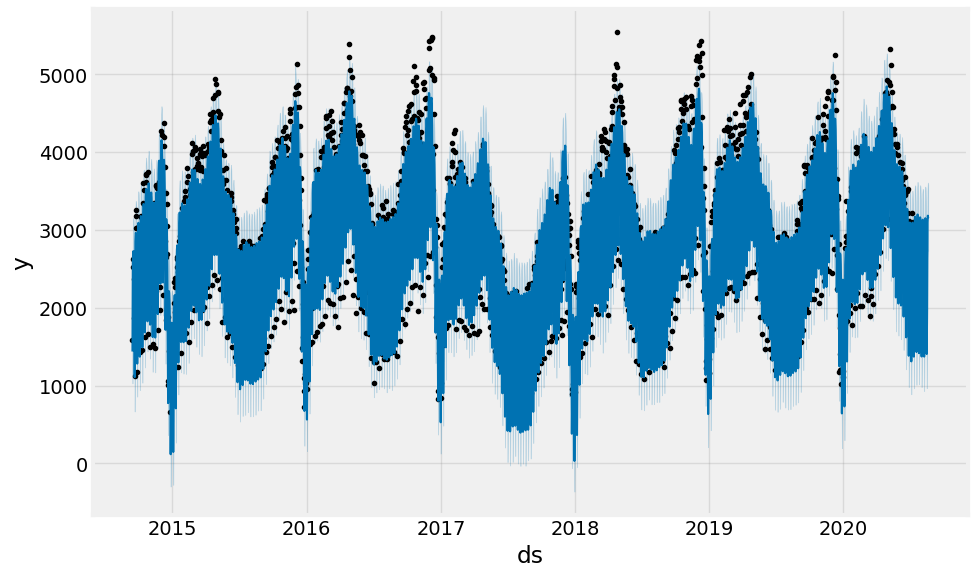

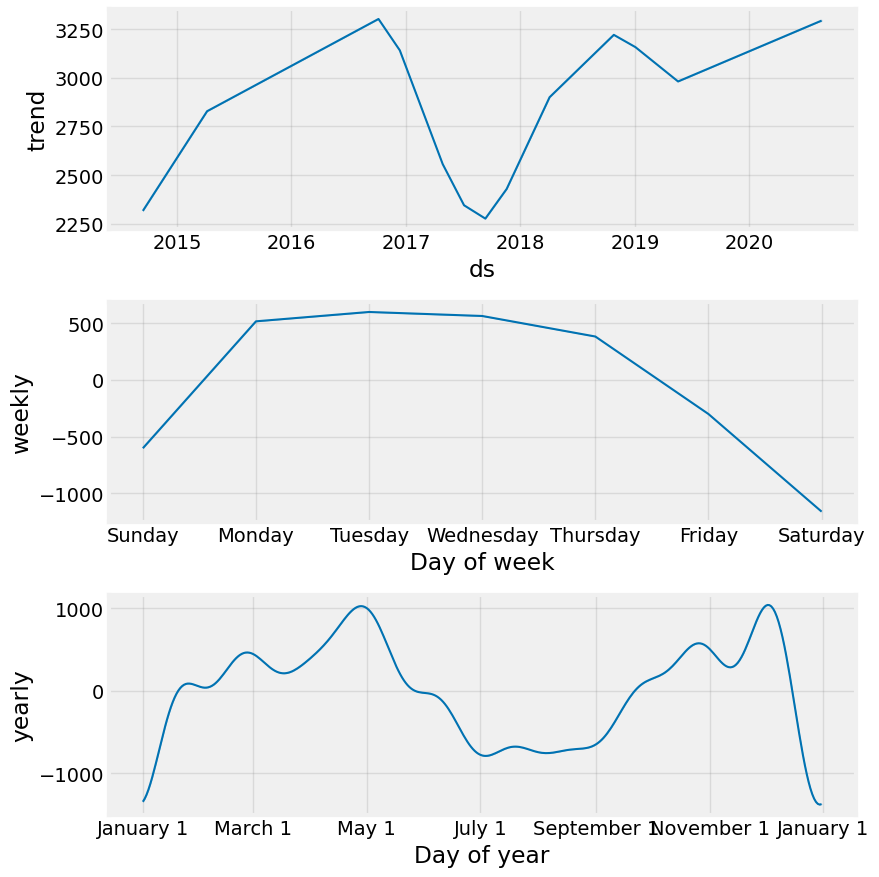

In [ ]:
# Importações
import pandas as pd
import prophet
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

# Configuração matplotlib
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Carregar o dataset
df = pd.read_csv('daily-website-visitors.csv') 

# Preparar os dados
df = df.rename(columns={'Date': 'ds', 'Unique.Visits': 'y'})  # renomear colunas
df['ds'] = pd.to_datetime(df['ds'], format='%m/%d/%Y')        # ajustar formato MM/DD/YYYY
df['y'] = df['y'].replace(',', '', regex=True).astype(int)    # remover vírgula e converter para inteiro

# Separar treino e teste
train_data = df[:-30]
test_data = df[-30:]

# Inicializar e treinar o modelo
model = Prophet()
model.fit(train_data)

# Criar futuro para previsão
future = model.make_future_dataframe(periods=30, freq='D')

# Fazer previsões
forecast = model.predict(future)

# Comparar previsões com dados reais
comparison = pd.DataFrame({'Date': test_data['ds'], 'Actual': test_data['y'], 'Predicted': forecast['yhat'][-30:]})
print(comparison)

# Plotar previsões
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)


In [8]:
# Avaliar desempenho
y_true = test_data['y'].values
y_pred = forecast['yhat'][-30:].values

mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

mse = mean_squared_error(y_true, y_pred)
print('MSE: %.3f' % mse)

rmse = root_mean_squared_error(y_true, y_pred)
print('RMSE: %.3f' % rmse)

MAE: 269.996
MSE: 149364.123
RMSE: 386.477


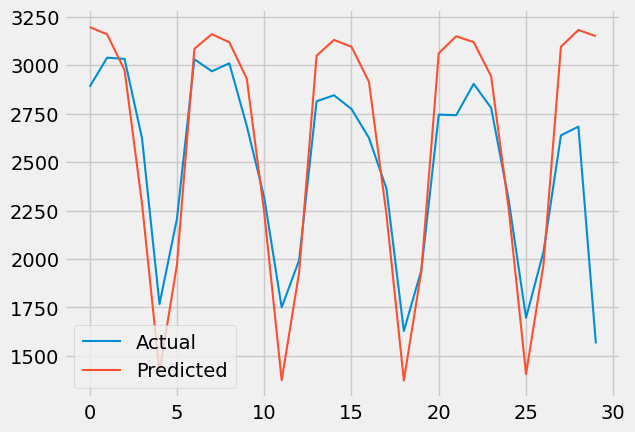

In [9]:
# Plotar comparação real vs previsto
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()